# White Noise

Now you know that a time series has three main components: the global pattern (which captures both the trend and seasonality), the local (predictable) pattern which should be stationary, and the (unpredictable) noise. 

Let's understand noise in detail. Remember that noise (or white noise) is what remains when all the predictable parts of a time series have been modelled and extracted from it. It is a set of independent and uncorrelated values. If you plot white noise over time, it will look something like this:

![alt text](white_noise.png "White Noise")

Notice that there are no identifiable trend, seasonal or cyclical components. So a white noise series is basically an example of a stationary series. It is basically a series of values that are all independent. Also, the mean of the series is zero with a constant variance. 

Let's use Python to create a similar plot for white noise.

In [1]:
#importing required Python libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

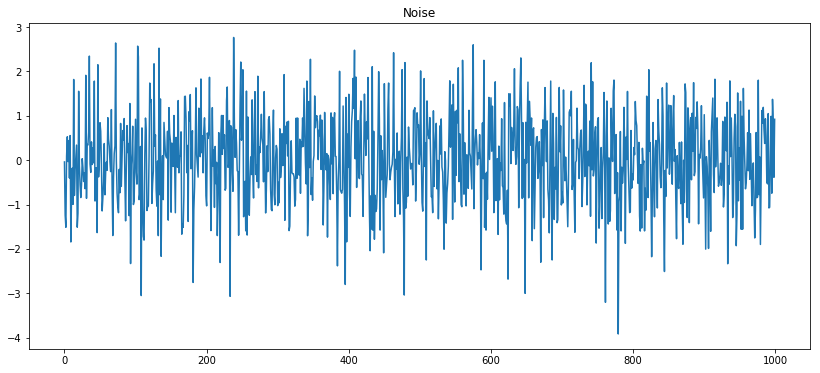

In [2]:
#creating white noise series

noise = np.random.normal(0, 1, 1000)

plt.figure(figsize = (14,6))
plt.plot(noise)
plt.title("Noise")
plt.show()

The function '**np.random.normal**' returns a random series of numbers distributed normally. To  check this, you can calculate the mean and standard deviation of the series. The mean value for the series will be '0' and the standard deviation for it will be '1'. Code for the same has been mentioned below.

In [3]:
mu = np.mean(noise)
sigma = np.std(noise)

print('Mean value for noise: {}, \nStandard deviation for noise: {}'.format(round(mu, 1), round(sigma, 1)))


Mean value for noise: 0.0, 
Standard deviation for noise: 1.0


The two values calculated above show that the the generated series 'noise' follows a normal distribution. 

However, the graphs for stationary series and white noise look very similar when you plot them. It may actually be a little difficult to tell the two apart. Only performing a visual inspection of the time series plot will not help you confirm if the series is white noise. This is because any stationary series would resemble a pure white noise series.

Hence, you will have to perform some concrete tests to check whether the series is noise, or if it is just a stationary series. As you learnt earlier, if the series is white noise, the values in it will belong to a normal distribution. Hence, you can test if the series’ values belong to a normal distribution or not. For this, you can use two tests:
1. Histogram test
2. Q-Q Plot test

### 1. Histogram Test

A histogram helps in visualising the distribution of a series. It scales the frequency of the data points over a range or interval in the series. It also gives a sense of probability distribution.

Here, the aim is to create a histogram plot for a pure white noise series. A white noise has the following features:
- The variables are identically distributed with a mean of zero.
- All the variables have the same variance (sigma^2).
- Each value has a zero correlation with all other values in the series.

Hence, the histogram plot of a pure noise should follow a Gaussian distribution. Let's use the libraries in Python to demostrate the histogram plot for white noise.

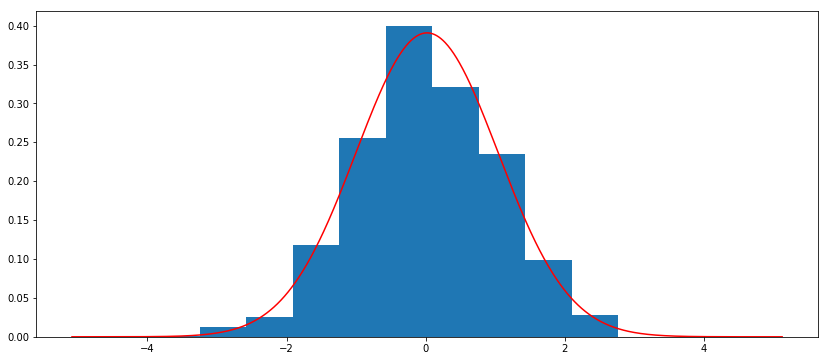

In [4]:
#plotting histogram for the series and comparing with the normal distribution

import matplotlib.mlab as mlab

x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
x = pd.Series(x)
y = mlab.normpdf(x, mu, sigma)

plt.figure(figsize = (14,6))
plt.plot(x, y, color = 'r')
plt.hist(noise, bins = 10, density = True) #'density = True' scales the histogram between (0,1)
plt.show()

**Note**: To plot a normal distribution, we have used the module '**mlab**' present in the matplot library. 'mlab' module provides various numerical functions that have been derived from MATLAB. Here we use it to plot a normal distribution curve over the noise histogram plotted above.

### 2. Q-Q-Plot Test

Another way to test white noise is to construct a Q-Q-plot. Q-Q-plot is a way to compare two distributions by plotting the quantiles of the two distributions against each other. In our case, we plot the quantiles of the given time series with an ideal Gaussian. If the two distributions are identical then the plot should be almost a 45° straight line starting from the origin. You can refer to the link below if you want to know how a QQ plot is created.

https://www.youtube.com/watch?reload=9&v=okjYjClSjOg

Our aim here is to check if the QQ plot of the series is a straight line or not. Hence, you need to import another library **statsmodels.api** as it has a function for generating a QQ plot. The code is provided below.

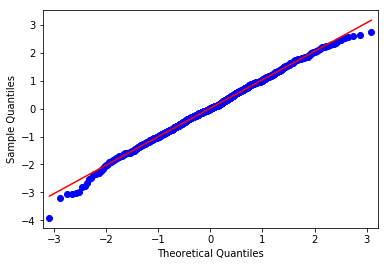

In [5]:
# Code for the QQ Plot
import statsmodels.api as sm
sm.qqplot(noise, line = 's')
plt.show()

As it can be seen in the plot above, the QQ plot for 'noise' closely follows the path of line y=x. Based on this, you can say that the series 'noise' follows a normal distribution.

Based on both the tests, it can concluded that the series is normally distributed with constant variance and mean as zero.

Other than the tests mentioned above, i.e. the histogram test and the Q-Q plot test, there are a few more popular tests that can be used to understand whether a series is white noise or not. Some of them are listed here:

1. Ljung-Box (Portmanteau) test
2. Turning point test
3. Difference sign test
4. Runs test
5. Rank test
6. ACF and PACF

Due to time constraints, we have not covered all these tests in this course. We already covered histogram plots and Q-Q plots, and we will cover ACF and PACF plots in a subsequent section. However, if you wish to go through the other five tests, you can go through the lecture notes.